In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
model_3_data = pd.read_csv('data/model_2_data.csv')

In [3]:
model_3_data.head()

,price,sqft_living,sqft_lot,waterfront,Season_Summer,Season_Fall,Season_Winter,Bedrooms_2,Bedrooms_3,Bedrooms_4,...,fifth_chunk,renovation_10,Section_2,Section_3,Section_4,Section_5,Section_6,Section_7,Section_8,Section_9
0,221900,1180,5650,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,538000,2570,7242,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,180000,770,10000,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000,1960,5000,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,510000,1680,8080,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


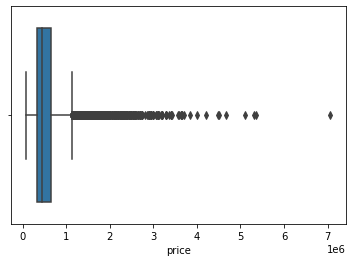

In [4]:
ax = sns.boxplot(x=model_3_data.price)

In [5]:
sev_fiv_percentile = np.percentile(model_3_data.price, 75)
twe_fiv_percentile = np.percentile(model_3_data.price, 25)
price_iqr = sev_fiv_percentile - twe_fiv_percentile

In [6]:
## Removes 1119 houses with price outliers
model_3_data = model_3_data.loc[(model_3_data.price <= sev_fiv_percentile + 1.5*price_iqr)
                              & (model_3_data.price >= twe_fiv_percentile - 1.5*price_iqr)]

<ipython-input-7-b5e1074264bc>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);


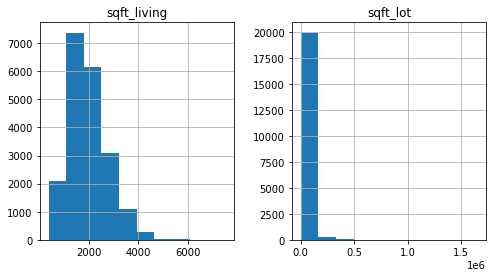

In [7]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);

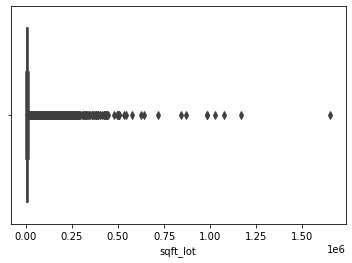

In [8]:
ax = sns.boxplot(x=model_3_data.sqft_lot)

In [9]:
sev_fiv_percentile_lot = np.percentile(model_3_data.sqft_lot, 75)
twe_fiv_percentile_lot = np.percentile(model_3_data.sqft_lot, 25)
sqft_lot_iqr = sev_fiv_percentile_lot - twe_fiv_percentile_lot

In [10]:
## Removes 2191 houses with sqft_lot outliers
model_3_data = model_3_data.loc[(model_3_data.sqft_lot <= sev_fiv_percentile_lot + 1.5*sqft_lot_iqr)
                              & (model_3_data.sqft_lot >= twe_fiv_percentile_lot - 1.5*sqft_lot_iqr)]

<ipython-input-11-383805a4f524>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);


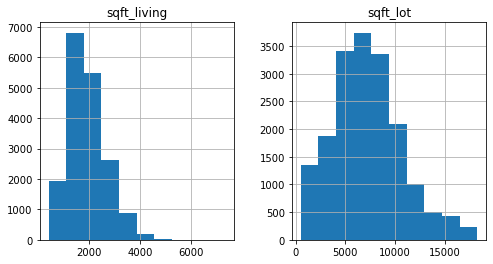

In [11]:
fig2 = plt.figure(figsize=(8,4))
ax = fig2.gca()
model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);

In [12]:
target_variable = 'price'
input_variables = model_3_data.drop('price', axis=1).columns
formula = target_variable + '~' + '+'.join(input_variables)

In [13]:
model_3 = ols(formula=formula, data=model_3_data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1005.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:37:10   Log-Likelihood:            -2.3496e+05
No. Observations:               17991   AIC:                         4.700e+05
Df Residuals:                   17950   BIC:                         4.703e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.168e+05    2.7e+04      8.042      0.000    1.64e+05     2.7e+05
sqft_living           127.6279      2.127     60.008      0.000     123.459     131.797
sqft_lot               -2.7687      0.339     -8.157      0.000      -3.434      -2.103
waterfront           9.884e+04   2.07e+04      4.772      0.000    5.82e+04    1.39e+05
Season_Summer       -1.803e+04   2209.941     -8.158      0.000   -2.24e+04   -1.37e+04
Season_Fall         -2.386e+04   2339.843    -10.196      0.000   -2.84e+04   -1.93e+04
Season_Winter       -2.262e+04   2561.586     -8.831      0.000   -2.76e+04   -1.76e+04
Bedrooms_2           1.739e+04   9970.238      1.745      0.081   -2149.057    3.69e+04
Bedrooms_3            2.21e+04   9927.780      2.226      0.026    2637.430    4.16e+04
Bedrooms_4            1.28e+04   1.02e+04      1.261      0.207   -7103.996    3.27e+04
Bedrooms_5          -5529.6767   1.07e+04     -0.515      0.607   -2.66e+04    1.55e+04
Bedrooms_6_up       -3.095e+04   1.29e+04     -2.397      0.017   -5.63e+04   -5643.126
Bathrooms_2          6056.5100   2439.278      2.483      0.013    1275.290    1.08e+04
Bathrooms_3          2.845e+04   4219.025      6.744      0.000    2.02e+04    3.67e+04
Bathrooms_4          2.992e+04   1.13e+04      2.647      0.008    7763.837    5.21e+04
Bathrooms_5_up      -5.416e+04   3.36e+04     -1.612      0.107    -1.2e+05    1.17e+04
Floors_2              1.14e+04   2724.088      4.185      0.000    6061.770    1.67e+04
Floors_3            -4189.8457   5923.560     -0.707      0.479   -1.58e+04    7420.901
View_1               9.142e+04   7393.971     12.364      0.000    7.69e+04    1.06e+05
View_2               7.566e+04   4561.644     16.587      0.000    6.67e+04    8.46e+04
View_3               1.057e+05   7248.088     14.583      0.000    9.15e+04     1.2e+05
View_4               2.098e+05   1.22e+04     17.227      0.000    1.86e+05    2.34e+05
Condition_2          9.038e+04   2.75e+04      3.285      0.001    3.65e+04    1.44e+05
Condition_3           1.15e+05   2.56e+04      4.492      0.000    6.48e+04    1.65e+05
Condition_4          1.444e+05   2.56e+04      5.639      0.000    9.42e+04    1.95e+05
Condition_5          1.709e+05   2.57e+04      6.642      0.000     1.2e+05    2.21e+05
Grade_Above_Average  9.438e+04   2293.842     41.144      0.000    8.99e+04    9.89e+04
Grade_High_Quality   2.188e+05   5802.875     37.703      0.000    2.07e+05     2.3e+05
second_chunk        -4.527e+04   3512.015    -12.891      0.000   -5.22e+04   -3.84e+04
third_chunk         -9.091e+04   3507.446    -25.918      0.000   -9.78e+04    -8.4e+04
fourth_chunk        -1.151e+05   3956.124    -29.088      0.000   -1.23e+05   -1.07e+05
fifth_chunk         -1.108e+05   4375.918    -25.313      0.000   -1.19e+05   -1.02e+05
ren

 #### Assumption of Normality<br>&emsp;(for Model_3)

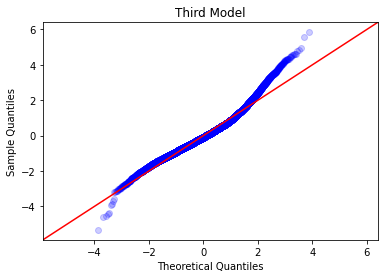

In [14]:
residuals = model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', alpha=0.2)
plt.title('Third Model', size=12);

#### Assumption of Homoscedasticity<br>&emsp;(for Model_3)

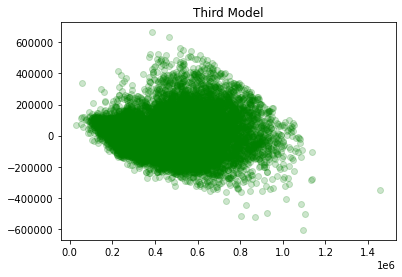

In [15]:
fig1,ax1 = plt.subplots()
ax1.scatter(x=model_3.predict(), y=residuals, color='green', alpha=0.2)
plt.title('Third Model', size=12);

In [16]:
x_data = model_3_data.drop(['price'], axis=1)
y_data = model_3_data.price

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_estimate_train = linreg.predict(X_train)
y_estimate_test = linreg.predict(X_test)

In [19]:
train_rmse = mean_squared_error(Y_train, y_estimate_train, squared=False)
test_rmse = mean_squared_error(Y_test, y_estimate_test, squared=False)
print(train_rmse, test_rmse)

113930.9375095537 113065.97599200968


In [20]:
model_3_data.to_csv('data/model_3_data.csv', index=False)